In [ ]:
# Kjører funksjonen fra Oppgave_4, slik at vi kan bruke den i denne oppgaven
#%run ./Oppgave_3_del_2.ipynb 

#Ikke lengre nødvendig når vi bruker CSV.

Importerer nødvendige biblioteker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = '../data/csv/ENOL_wind_data.csv'
df_ENOL = pd.read_csv(file_path)


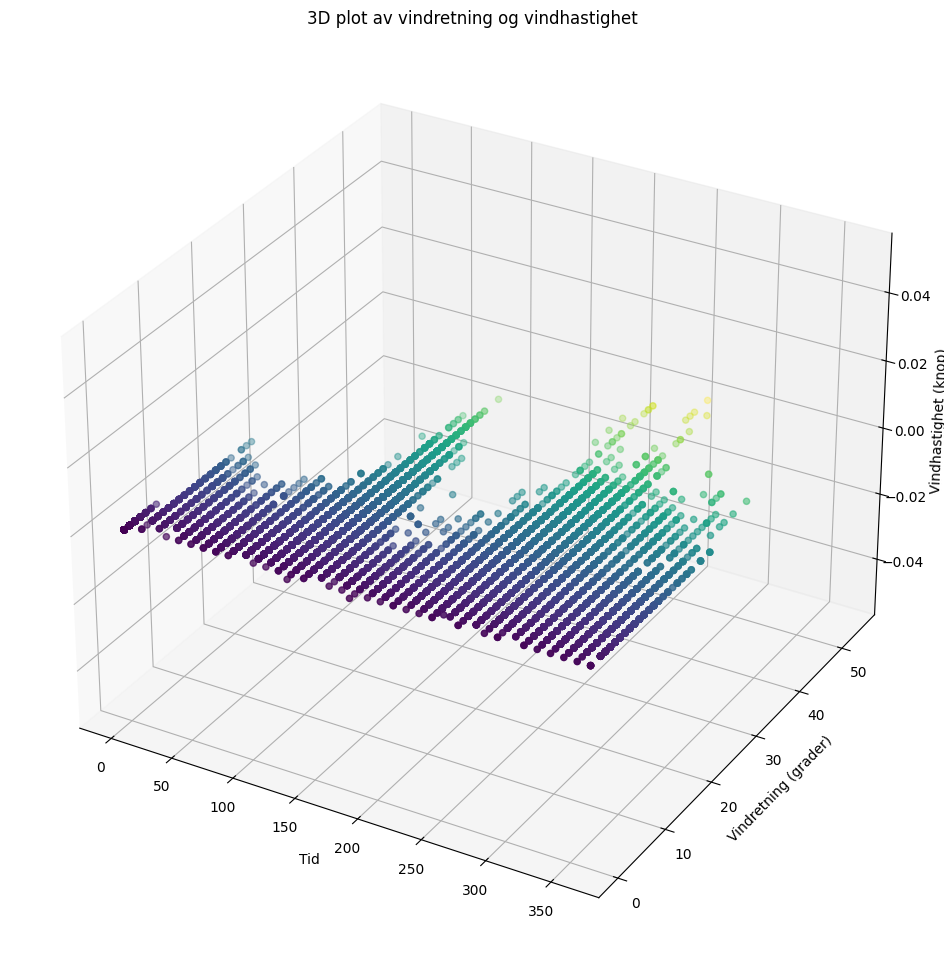

In [6]:
# 3D plot av vindretning og vindhastighet
#df_ENOL['Date/time'] = pd.to_datetime(df_ENOL['Date/time'], format="%d-%M-%SZ")

fig = plt.figure(figsize=(40, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ENOL['Wind_direction'], df_ENOL['Wind_speed'], c=df_ENOL['Wind_speed'], cmap='viridis', marker='o')
ax.set_title('3D plot av vindretning og vindhastighet')
ax.set_xlabel('Tid')
ax.set_ylabel('Vindretning (grader)')
ax.set_zlabel('Vindhastighet (knop)')
plt.show()

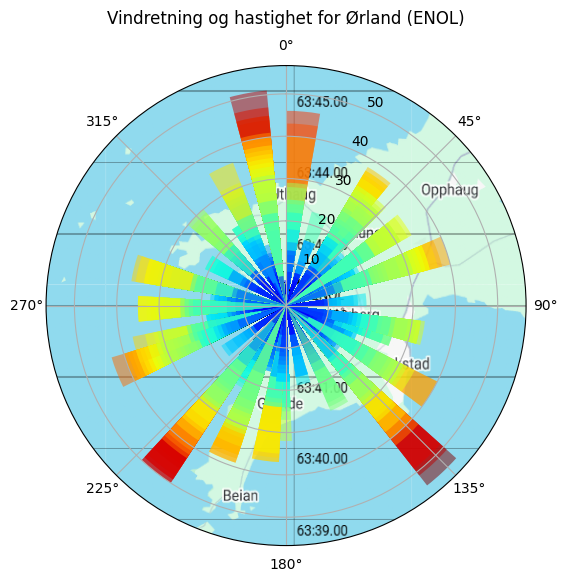

In [7]:
# Konverter vindretningen fra grader til radianer (for polarplot)
theta = df_ENOL['Wind_direction']
radii = df_ENOL['Wind_speed']

# Sett en konstant bredde for stolpene, f.eks. 10 grader (omregnet til radianer)
width = np.deg2rad(10)

# Lag figur og polar akse
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

ax.set_theta_zero_location("N") # Sett nullpunktet til nord
ax.set_theta_direction(-1)

img = plt.imread("../resources/images/ENOL_kart.png")
ax.imshow(img, extent=[0, 1, 0, 1], transform=ax.transAxes, zorder=0)

# Lag stolpediagrammet
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Tilpass farger etter vindhastigheten
for r, bar in zip(radii, bars):
    bar.set_facecolor(cm.jet(r / np.max(radii)))
    bar.set_alpha(0.5)

ax.set_title("Vindretning og hastighet for Ørland (ENOL)", pad=30)

plt.show()

In [8]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

avg_wind_speed = [
    df_ENOL['Wind_speed'][:48*31].mean(),           # Jan
    df_ENOL['Wind_speed'][48*31:48*60].mean(),      # Feb (skuddår i 2024)
    df_ENOL['Wind_speed'][48*60:48*91].mean(),      # Mar
    df_ENOL['Wind_speed'][48*91:48*121].mean(),     # Apr
    df_ENOL['Wind_speed'][48*121:48*152].mean(),    # May
    df_ENOL['Wind_speed'][48*152:48*182].mean(),    # Jun
    df_ENOL['Wind_speed'][48*182:48*213].mean(),    # Jul
    df_ENOL['Wind_speed'][48*213:48*244].mean(),    # Aug
    df_ENOL['Wind_speed'][48*244:48*274].mean(),    # Sep
    df_ENOL['Wind_speed'][48*274:48*305].mean(),    # Oct
    df_ENOL['Wind_speed'][48*305:48*335].mean(),    # Nov
    df_ENOL['Wind_speed'][48*335:48*366].mean()     # Dec
]

avg_wind_direction = [
    df_ENOL['Wind_direction'][:48*31].mean(),           # Jan
    df_ENOL['Wind_direction'][48*31:48*60].mean(),      # Feb (skuddår i 2024)
    df_ENOL['Wind_direction'][48*60:48*91].mean(),      # Mar
    df_ENOL['Wind_direction'][48*91:48*121].mean(),     # Apr
    df_ENOL['Wind_direction'][48*121:48*152].mean(),    # May
    df_ENOL['Wind_direction'][48*152:48*182].mean(),    # Jun
    df_ENOL['Wind_direction'][48*182:48*213].mean(),    # Jul
    df_ENOL['Wind_direction'][48*213:48*244].mean(),    # Aug
    df_ENOL['Wind_direction'][48*244:48*274].mean(),    # Sep
    df_ENOL['Wind_direction'][48*274:48*305].mean(),    # Oct
    df_ENOL['Wind_direction'][48*305:48*335].mean(),    # Nov
    df_ENOL['Wind_direction'][48*335:48*366].mean()     # Dec
]


In [ ]:
#airport = df_ENOL
#df_avg_wind = airport[airport.group.isin(["011220Z"])]
#df_avg_wind

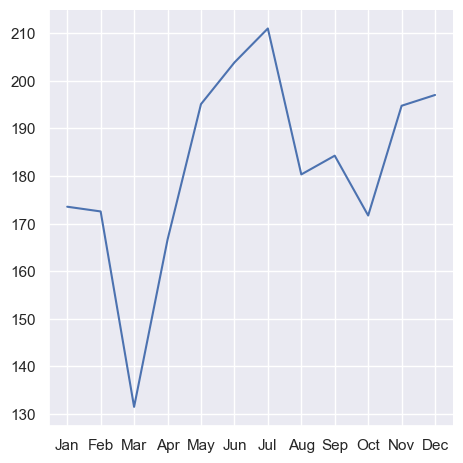

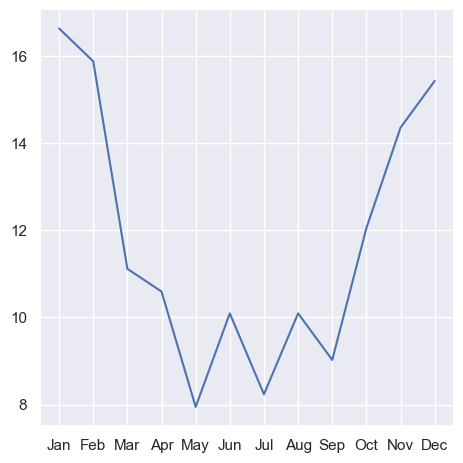

In [9]:
sns.set_theme(style="darkgrid")
sns.relplot(x = months, y = avg_wind_direction, kind="line")
sns.relplot(x = months, y = avg_wind_speed, kind="line")


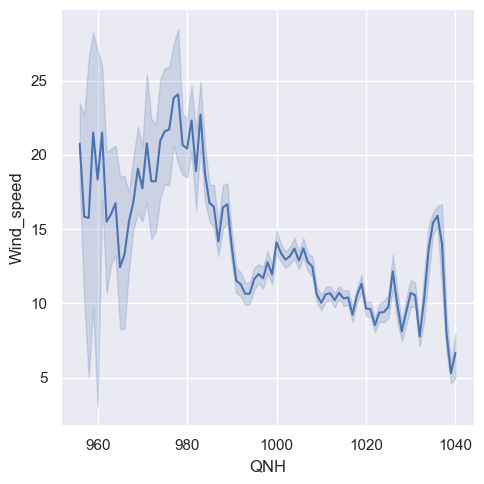

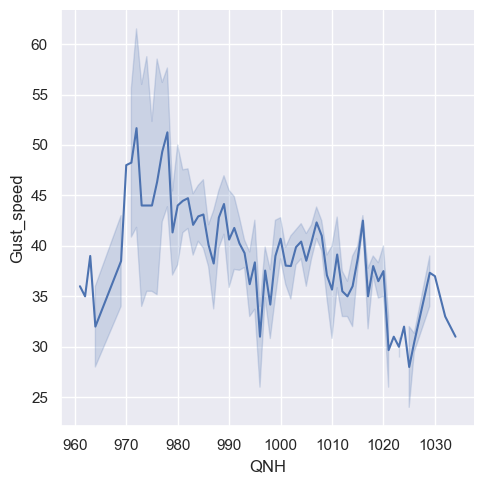

In [10]:
# Tilfeller der trykket QNH er lavt og vindhastigheten er høy

sns.set_theme(style="darkgrid")

sns.relplot(x = df_ENOL['QNH'], y = df_ENOL['Wind_speed'], kind="line")

sns.relplot(x = df_ENOL['QNH'], y = df_ENOL['Gust_speed'], kind="line")



Text(0.5, 1.03, 'Vindkast-hastighet og trykk QNH')

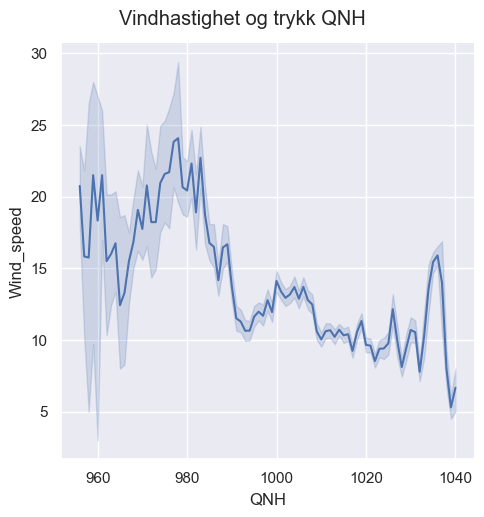

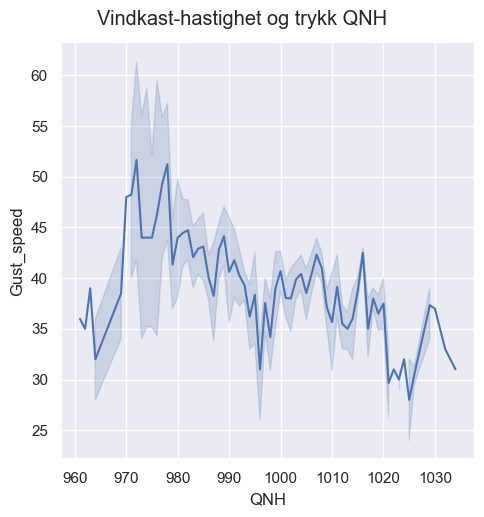

In [11]:
# Første plott
plot1 = sns.relplot(x="QNH", y="Wind_speed", kind="line", data=df_ENOL)
plot1.fig.suptitle("Vindhastighet og trykk QNH", y=1.03)  # Setter tittel

# Andre plott
plot2 = sns.relplot(x="QNH", y="Gust_speed", kind="line", data=df_ENOL)
plot2.fig.suptitle("Vindkast-hastighet og trykk QNH", y=1.03)  # Setter tittel

In [13]:
# Er standardaviken for vindhastighet og vindkast-hastighet lik?
std_wind_speed = df_ENOL['Wind_speed'].std()
std_gust_speed = df_ENOL['Gust_speed'].std()
print(f"Standardavvik vindhastighet: {std_wind_speed}")
print(f"Standardavvik vindkast-hastighet: {std_gust_speed}")
# Er standaraviken større for vindhastighet når det er lavt trykk?


Standardavvik vindhastighet: 7.122203361724569
Standardavvik vindkast-hastighet: 7.381538960718694


In [14]:
df_ENOL['Day'] = [int(x) for x in df_ENOL['Date/time'].str[:2]]
 
# Filtrer rader der Day er lik 1
day_1_rows = df_ENOL[df_ENOL['Day'] == 1]
 
# Print de filtrerte radene
print(day_1_rows)
 
# Kombiner numeriske kolonner
merged_day_1 = day_1_rows.agg({
    'Wind_speed': 'mean',
    'Wind_direction': 'mean',
    'Gust_speed': 'mean'
})
 
# Behold den første verdien i Date/time
first_date_time = day_1_rows['Date/time'].iloc[0]
 
# Legg til Date/time i resultatet
merged_day_1['Date/time'] = first_date_time
 
# Print den kombinerte raden
print(merged_day_1)

      Airport Date/time  Wind_direction  Wind_speed  Gust_speed   QNH  Day
0        ENOL   010020Z             120          31         NaN  1007    1
1        ENOL   010050Z             120          31         NaN  1006    1
2        ENOL   010120Z             120          32         NaN  1006    1
3        ENOL   010150Z             120          29        39.0  1006    1
4        ENOL   010220Z             120          30        44.0  1006    1
...       ...       ...             ...         ...         ...   ...  ...
16251    ENOL   012150Z             230          11         NaN   991    1
16252    ENOL   012220Z             210           6         NaN   992    1
16253    ENOL   012250Z             230          14         NaN   992    1
16254    ENOL   012320Z             250          16         NaN   992    1
16255    ENOL   012350Z             240          24         NaN   992    1

[584 rows x 7 columns]
Wind_speed         14.169521
Wind_direction    183.613014
Gust_speed        